# <Center>**ASSESSING AND MODELING MATHEMATICS LEARNING IN HIGHER EDUCATION**</center>

*Data citation:* B. Flamia Azevedo, M. Pacheco, F. P. Fernandes, and A. Pereira. "Dataset for Assessing Mathematics Learning in Higher Education," UCI Machine Learning Repository, 2024. [Online]. Available: https://doi.org/10.34620/dadosipb/PW3OWY.

## <center>**Data Analysis and Visualization**</center>

### **Setup**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### **Inspection and Descriptive Statistics**

In [2]:
# identify the encoding system used for the data
import chardet

with open('MathE_dataset.csv', 'rb') as rawdata:
    res = chardet.detect(rawdata.read(100000))
    print(res)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
df = pd.read_csv('MathE_dataset.csv', delimiter=';', encoding='latin1')
df.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [4]:
df.shape

(9546, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


In [6]:
categorical_cols = ['Student Country', 'Question Level', 'Topic', 'Subtopic', 'Keywords']

for col in categorical_cols:
    print('\n',df[col].value_counts())


 Student Country
Portugal              5495
Lithuania             1443
Italy                 1358
Slovenia               755
Ireland                300
Russian Federation     107
Romania                 60
Spain                   28
Name: count, dtype: int64

 Question Level
Basic       7844
Advanced    1702
Name: count, dtype: int64

 Topic
Linear Algebra                         5726
Fundamental Mathematics                 818
Complex Numbers                         592
Differentiation                         579
Analytic Geometry                       358
Statistics                              340
Numerical Methods                       310
Optimization                            182
Real Functions of a single variable     164
Integration                             144
Probability                             128
Differential Equations                  108
Graph Theory                             55
Set Theory                               42
Name: count, dtype: int64

 Subtopic
Ve

In [7]:
question_level_ans = df[['Question Level', 'Type of Answer']].value_counts().reset_index(name='count')
question_level_ans

,Question Level,Type of Answer,count
0,Basic,0,4227
1,Basic,1,3617
2,Advanced,1,853
3,Advanced,0,849


### **Visualize the Distributions**

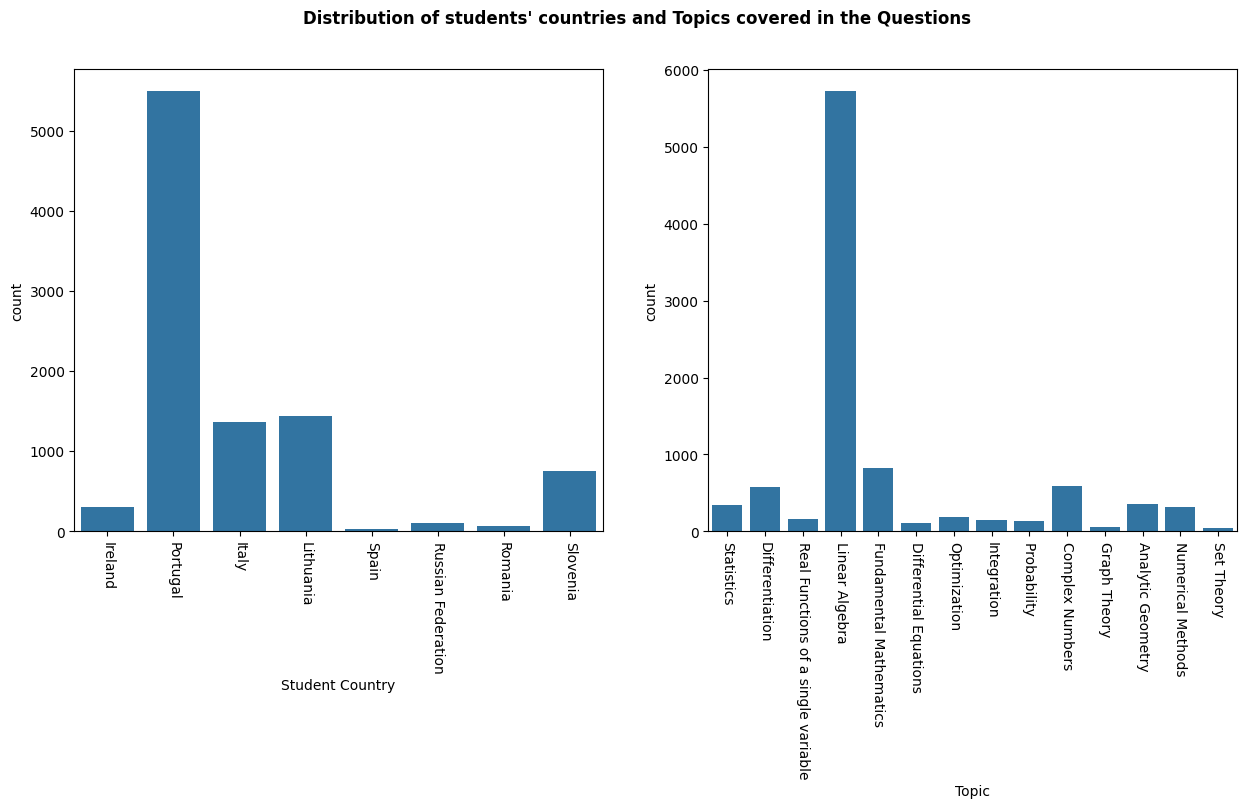

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='Student Country', ax=axs[0])
axs[0].tick_params(axis = 'x', rotation=-90)


sns.countplot(data=df, x='Topic', ax=axs[1])
axs[1].tick_params(axis = 'x', rotation=-90)
# sns.countplot(data=df, x='Question Level', ax=axs[1])

fig.suptitle('Distribution of students\' countries and Topics covered in the Questions', fontweight='bold')
plt.show()

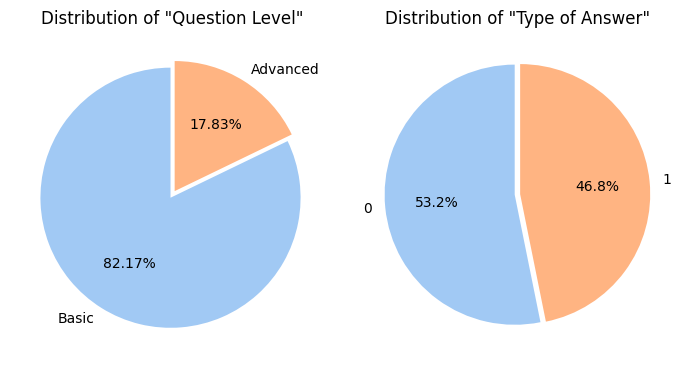

In [9]:
palette_color = sns.color_palette("pastel")

# Count values for each category
ques_level_count = df['Question Level'].value_counts()
answer_type_count = df['Type of Answer'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(7, 6))

# Define explode values
explode_ques_level_count = [0.03] * len(ques_level_count)
explode_ans_type_count = [0.021] * len(answer_type_count)

# Pie chart for 'Question Level'
axs[0].pie(ques_level_count, labels=ques_level_count.index, autopct='%1.2f%%', startangle=90, colors=palette_color, explode=explode_ques_level_count)
axs[0].set_title('Distribution of \"Question Level\"')

# Pie chart for 'Type of Answer'
axs[1].pie(answer_type_count, labels=answer_type_count.index, autopct='%1.1f%%', startangle=90, colors=palette_color, explode=explode_ans_type_count)
axs[1].set_title('Distribution of \"Type of Answer\"')

plt.tight_layout()
plt.show()


In [10]:
df.columns

Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords'],
      dtype='object')

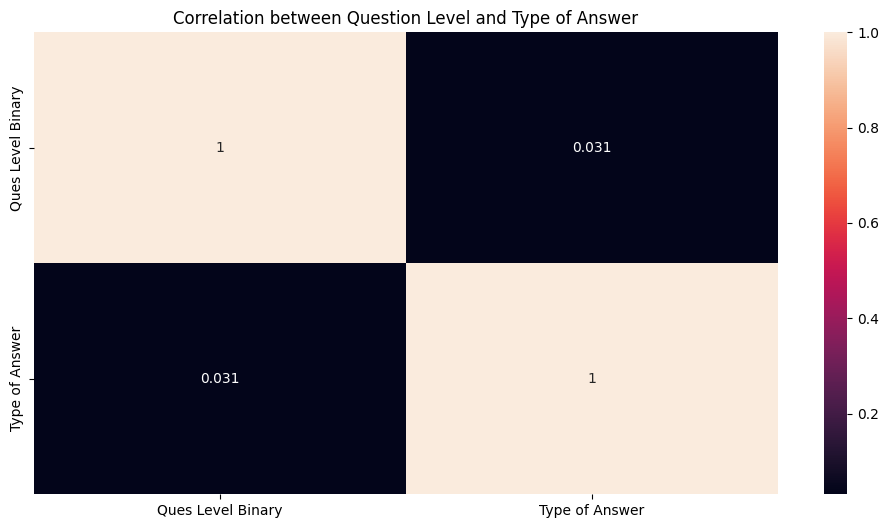

In [11]:
# Check the correlation between the question level and type of answer
plt.figure(figsize=(12, 6))

df['Ques Level Binary'] = df['Question Level'].apply(lambda x: 1 if x == 'Advanced' else 0)
sns.heatmap(
    df[['Ques Level Binary', 'Type of Answer']].corr(),
    annot=True,
)
plt.title('Correlation between Question Level and Type of Answer')
plt.show()

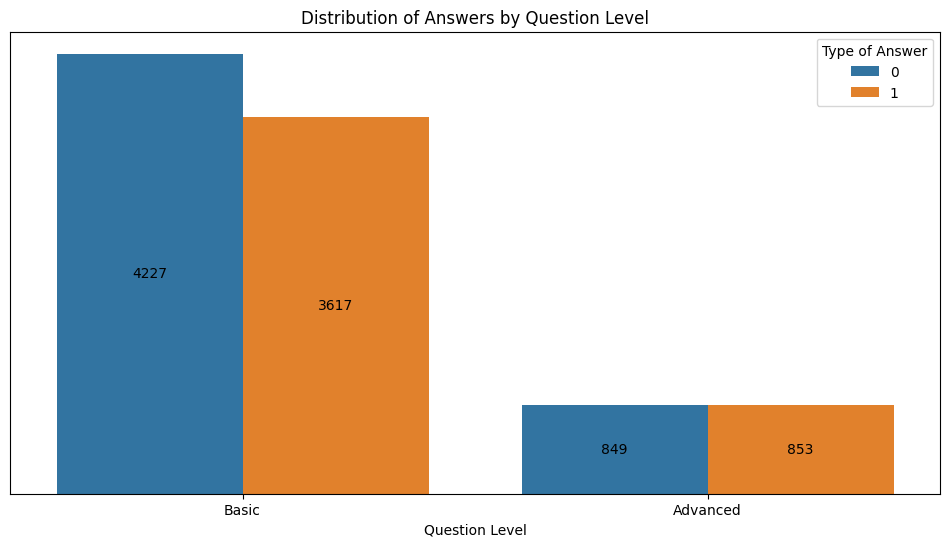

In [12]:
colors = sns.color_palette('dark6')
plt.figure(figsize=(12, 6))
ax = sns.countplot(df, x='Question Level', hue='Type of Answer')
ax.yaxis.set_visible(False)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d')

plt.title('Distribution of Answers by Question Level')
plt.show()

In [13]:
df.columns

Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords', 'Ques Level Binary'],
      dtype='object')

In [14]:
# Get the distribution of categorical features
country_ans_proportion = df.groupby(['Student Country', 'Type of Answer'])['Type of Answer'].value_counts().reset_index(name='Count')
topic_ans_proportion = df.groupby(['Topic', 'Type of Answer'])['Type of Answer'].value_counts().reset_index(name='Count')

Text(0.5, 0.98, 'Distribution of answers by country and topic')

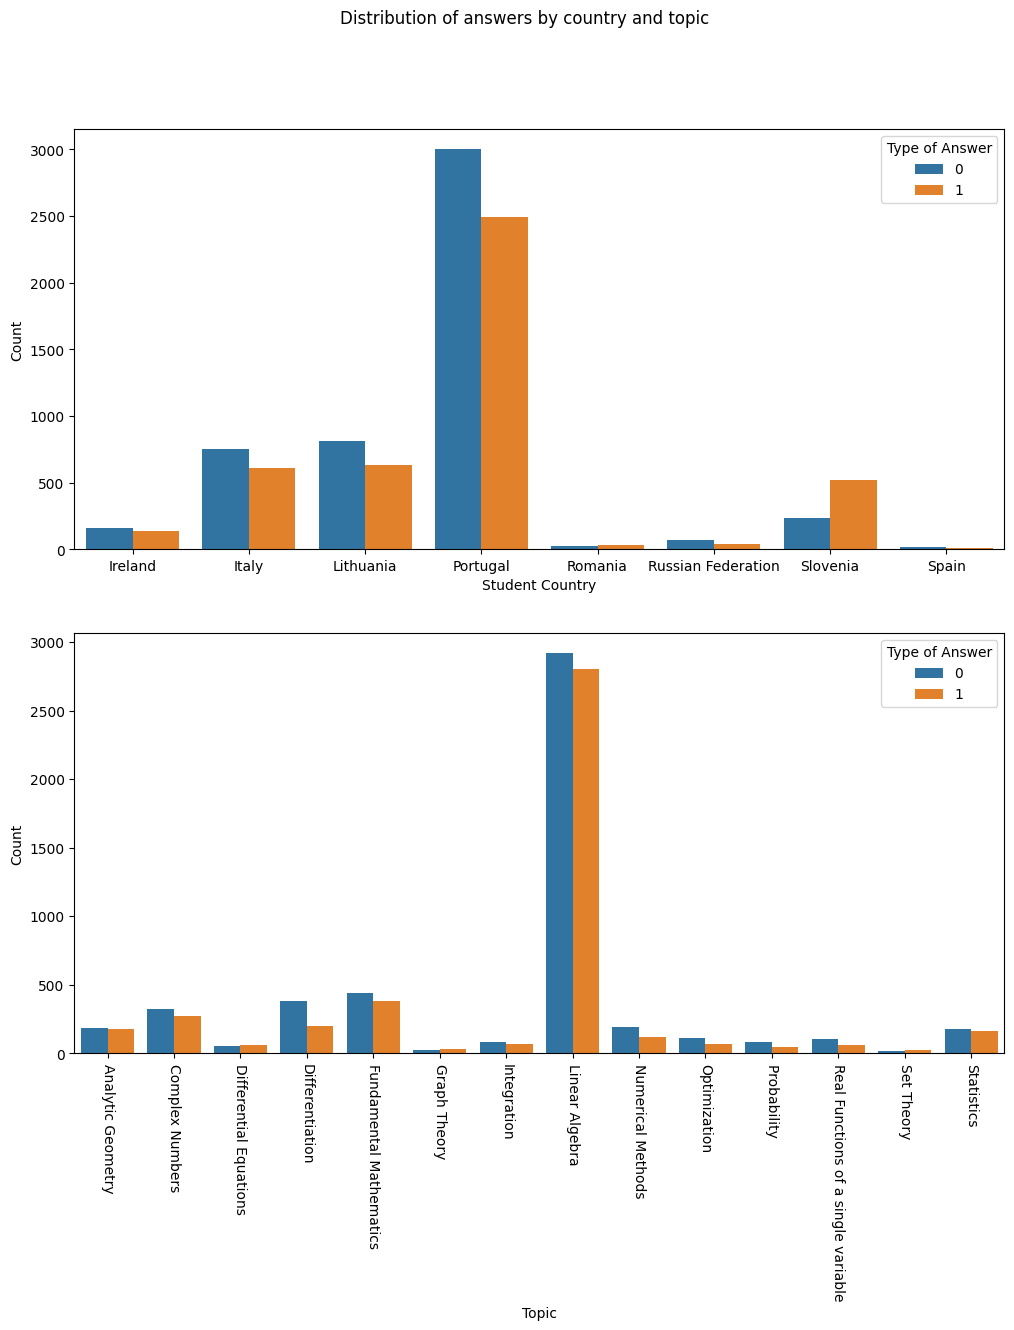

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(12,12))

sns.barplot(country_ans_proportion, x='Student Country', y='Count', hue='Type of Answer', ax=axs[0])
sns.barplot(topic_ans_proportion, x='Topic', y='Count', hue='Type of Answer', ax=axs[1])

axs[1].tick_params(axis='x', rotation=-90)
plt.suptitle('Distribution of answers by country and topic')

### **Word Analysis**

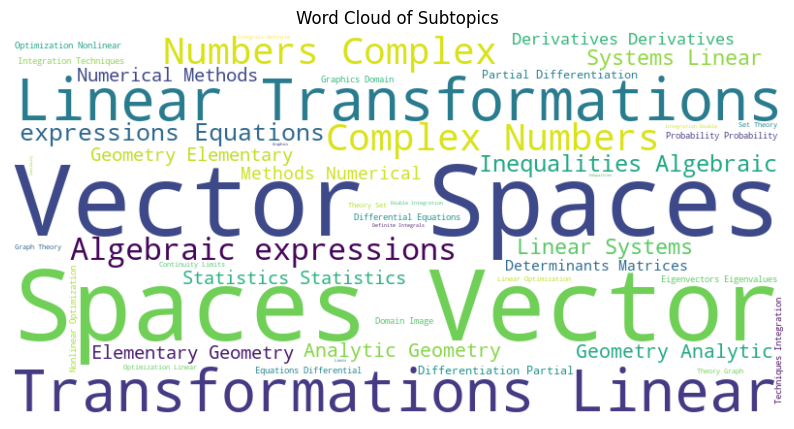

In [16]:
# Combine all keywords into a single string
subtopic_text = ' '.join(df['Subtopic'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subtopic_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Subtopics')
plt.show()


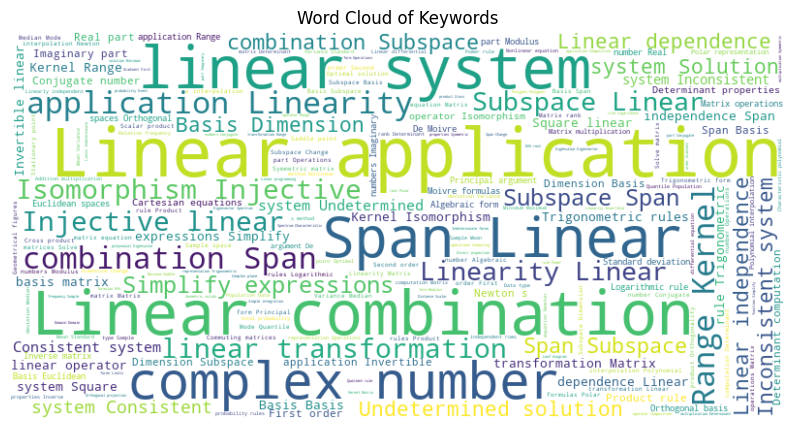

In [17]:
# Combine all keywords into a single string
keywords_text = ' '.join(df['Keywords'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()


## <center>**ML Modeling**</center>

### **Setup**

In [18]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers, backend as K
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

In [19]:
df.columns

Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords', 'Ques Level Binary'],
      dtype='object')

### **Preprocessing and Data Splitting**

In [32]:
target = 'Type of Answer'
features = ['Student Country', 'Question Level', 'Topic', 'Subtopic', 'Keywords']

# define features and target data
y = df[target]
X = df[features]

In [33]:
X.head()

,Student Country,Question Level,Topic,Subtopic,Keywords
0,Ireland,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,Portugal,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,Portugal,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,Italy,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,Portugal,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [64]:
X = pd.get_dummies(X, drop_first=True)
X.shape

(9546, 408)

In [35]:
X.head(1)

,Student Country_Italy,Student Country_Lithuania,Student Country_Portugal,Student Country_Romania,Student Country_Russian Federation,Student Country_Slovenia,Student Country_Spain,Question Level_Basic,Topic_Complex Numbers,Topic_Differential Equations,...,Keywords_Trigonometric substitution,"Keywords_Trigonometric substitution,Simple integration","Keywords_Unconstrained optimization,Second derivative test,Optimal solution","Keywords_Undetermined solution of linear system,Consistent system,Inconsistent system,Solution of linear system","Keywords_Undetermined solution of linear system,Consistent system,Square linear system,Inconsistent system,Solution of linear system","Keywords_Union of sets,Venn diagram,Complement of a set","Keywords_Volume of revolution,Fundamental theorem of Calculus","Keywords_y-simple region (type I),Area ,Cartesian coordinates","Keywords_y-simple region (type I),Cartesian coordinates,Area ,Iterate integrals","Keywords_y-simple region (type I),Cartesian coordinates,Iterate integrals"
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,Student Country_Italy,Student Country_Lithuania,Student Country_Portugal,Student Country_Romania,Student Country_Russian Federation,Student Country_Slovenia,Student Country_Spain,Question Level_Basic,Topic_Complex Numbers,Topic_Differential Equations,...,Keywords_Trigonometric substitution,"Keywords_Trigonometric substitution,Simple integration","Keywords_Unconstrained optimization,Second derivative test,Optimal solution","Keywords_Undetermined solution of linear system,Consistent system,Inconsistent system,Solution of linear system","Keywords_Undetermined solution of linear system,Consistent system,Square linear system,Inconsistent system,Solution of linear system","Keywords_Union of sets,Venn diagram,Complement of a set","Keywords_Volume of revolution,Fundamental theorem of Calculus","Keywords_y-simple region (type I),Area ,Cartesian coordinates","Keywords_y-simple region (type I),Cartesian coordinates,Area ,Iterate integrals","Keywords_y-simple region (type I),Cartesian coordinates,Iterate integrals"
0,-0.407250,-0.421998,-1.164670,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,-0.106972,...,-0.022892,-0.027089,-0.022892,-0.039671,-0.03072,-0.020474,-0.01773,-0.01773,-0.014476,-0.014476
1,-0.407250,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,-0.106972,...,-0.022892,-0.027089,-0.022892,-0.039671,-0.03072,-0.020474,-0.01773,-0.01773,-0.014476,-0.014476
2,-0.407250,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,-0.106972,...,-0.022892,-0.027089,-0.022892,-0.039671,-0.03072,-0.020474,-0.01773,-0.01773,-0.014476,-0.014476
3,2.455495,-0.421998,-1.164670,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,-0.106972,...,-0.022892,-0.027089,-0.022892,-0.039671,-0.03072,-0.020474,-0.01773,-0.01773,-0.014476,-0.014476
4,-0.407250,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,-0.106972,...,-0.022892,-0.027089,-0.022892,-0.039671,-0.03072,-0.020474,-0.01773,-0.01773,-0.014476,-0.014476


In [ ]:
# encoding categorical variables and standardize all features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), features)
    ], remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False))
])

X_transformed = pipeline.fit_transform(X)
X_transformed

In [37]:
# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=0)

### **Build the Model**

In [50]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [51]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor = 'loss',
    patience = 10,
    restore_best_weights = True
)

In [42]:
len(y_train)

7636

### **Train and validate the Model Using k-fold Validation**

In [52]:
k = 4
x_shape = X_train.shape
num_val_samples = x_shape[0] // k
num_epochs = 100
batch = 16
all_scores = []

# shuffle the data
X_train, y_train = shuffle(X_train, y_train)

for i in range(k):
    print(f"Processing fold {i}")
    # set aside validation data for ith fold
    val_input = X_train[i * num_val_samples: (i+1) * num_val_samples]
    val_target = y_train[i * num_val_samples: (i+1) * num_val_samples]

    # actual training data
    partial_x_train = np.concatenate([
        X_train[: i * num_val_samples],
        X_train[(i+1) * num_val_samples:]
    ], axis=0)
    
    partial_y_train = np.concatenate([
        y_train[: i * num_val_samples],
        y_train[(i+1) * num_val_samples:]
    ], axis = 0)

    # fit the model
    model = build_model()
    model.fit(
        partial_x_train, partial_y_train,
        epochs = num_epochs, batch_size = batch, verbose = 0,
        callbacks = [early_stop]
    )
    
    # evaluate the model on the validation data set
    loss_val, acc_val = model.evaluate(val_input, val_target, verbose=0)
    all_scores.append(acc_val)

    # clear session
    K.clear_session()

Processing fold 0
Processing fold 1
Processing fold 2
Processing fold 3


In [53]:
np.mean(all_scores)

0.5632530152797699

### **Sklearn Models**

In [258]:
X_train.head()

,Student Country_Italy,Student Country_Lithuania,Student Country_Portugal,Student Country_Romania,Student Country_Russian Federation,Student Country_Slovenia,Student Country_Spain,Question Level_Basic,Topic_Complex Numbers,Topic_Differential Equations,Topic_Differentiation,Topic_Fundamental Mathematics,Topic_Graph Theory,Topic_Integration,Topic_Linear Algebra,Topic_Numerical Methods,Topic_Optimization,Topic_Probability,Topic_Real Functions of a single variable,Topic_Set Theory,Topic_Statistics,Subtopic_Analytic Geometry,Subtopic_Complex Numbers,Subtopic_Definite Integrals,Subtopic_Derivatives,Subtopic_Differential Equations,"Subtopic_Domain, Image and Graphics",Subtopic_Double Integration,Subtopic_Eigenvalues and Eigenvectors,Subtopic_Elementary Geometry,Subtopic_Graph Theory,Subtopic_Integration Techniques,Subtopic_Limits and Continuity,Subtopic_Linear Optimization,Subtopic_Linear Systems,Subtopic_Linear Transformations,Subtopic_Matrices and Determinants,Subtopic_Nonlinear Optimization,Subtopic_Numerical Methods,Subtopic_Partial Differentiation,Subtopic_Probability,Subtopic_Set Theory,Subtopic_Statistics,Subtopic_Vector Spaces
578,-0.40725,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,9.348202,-0.254106,-0.306139,-0.076125,-0.123757,-1.224317,-0.183206,-0.139414,-0.11658,-0.132213,-0.066477,-0.192178,-0.197393,-0.25713,-0.039671,-0.185333,9.348202,-0.10647,-0.043465,-0.1175,-0.186839,-0.076125,-0.108465,-0.077505,-0.076818,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,-0.192178,-0.635958
8764,-0.40725,2.369680,-1.164670,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,-0.106972,3.935359,-0.306139,-0.076125,-0.123757,-1.224317,-0.183206,-0.139414,-0.11658,-0.132213,-0.066477,-0.192178,-0.197393,-0.25713,-0.039671,-0.185333,-0.106972,-0.10647,-0.043465,-0.1175,-0.186839,-0.076125,-0.108465,-0.077505,-0.076818,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,5.95274,-0.11658,-0.066477,-0.192178,-0.635958
916,-0.40725,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,-0.106972,-0.254106,-0.306139,-0.076125,-0.123757,-1.224317,-0.183206,-0.139414,-0.11658,-0.132213,-0.066477,5.203506,-0.197393,-0.25713,-0.039671,-0.185333,-0.106972,-0.10647,-0.043465,-0.1175,-0.186839,-0.076125,-0.108465,-0.077505,-0.076818,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958
10,-0.40725,2.369680,-1.164670,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,-0.106972,-0.254106,-0.306139,-0.076125,-0.123757,-1.224317,-0.183206,-0.139414,-0.11658,-0.132213,-0.066477,5.203506,-0.197393,-0.25713,-0.039671,-0.185333,-0.106972,-0.10647,-0.043465,-0.1175,-0.186839,-0.076125,-0.108465,-0.077505,-0.076818,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,-0.16799,-0.11658,-0.066477,5.203506,-0.635958
8657,-0.40725,-0.421998,0.858613,-0.079531,-0.10647,-0.293059,-0.054238,0.465812,-0.25713,-0.106972,3.935359,-0.306139,-0.076125,-0.123757,-1.224317,-0.183206,-0.139414,-0.11658,-0.132213,-0.066477,-0.192178,-0.197393,-0.25713,-0.039671,-0.185333,-0.106972,-0.10647,-0.043465,-0.1175,-0.186839,-0.076125,-0.108465,-0.077505,-0.076818,-0.214528,-0.53544,-0.180129,-0.115654,-0.183206,5.95274,-0.11658,-0.066477,-0.192178,-0.635958


In [63]:
# Define models to fit
models = {
    "logistic regression": LogisticRegression(),
    "decision tree classifier": DecisionTreeClassifier(),
    "random forest classifier": RandomForestClassifier(),
    "gradient boosting classifier": GradientBoostingClassifier()
}

# K-Fold setup
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize results dictionary to store metrics
results = {name: {'f1 scores': [], 'accuracy scores': [], 'roc_auc scores': []} for name in models}

# Convert DataFrames to numpy arrays for compatibility with KFold indexing
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# K-Fold Cross-Validation loop
for model_name, model in models.items():
    for train_index, val_index in kf.split(X_train_np):
        X_ktrain, X_kval = X_train_np[train_index], X_train_np[val_index]
        y_ktrain, y_kval = y_train_np[train_index], y_train_np[val_index]

        # Fit the model
        model.fit(X_ktrain, y_ktrain)

        # Predict and evaluate
        y_pred = model.predict(X_kval)
        y_proba = model.predict_proba(X_kval)[:, 1] if hasattr(model, "predict_proba") else None

        # Compute metrics
        f1 = f1_score(y_kval, y_pred)
        acc = accuracy_score(y_kval, y_pred)
        roc_auc = roc_auc_score(y_kval, y_proba) if y_proba is not None else None

        # Append scores
        results[model_name]['f1 scores'].append(f1)
        results[model_name]['accuracy scores'].append(acc)
        if roc_auc is not None:
            results[model_name]['roc_auc scores'].append(roc_auc)

    # Compute and print average metrics
    avg_f1 = np.mean(results[model_name]["f1 scores"])
    avg_acc = np.mean(results[model_name]["accuracy scores"])
    avg_roc_auc = np.mean(results[model_name]["roc_auc scores"]) if results[model_name]["roc_auc scores"] else None

    print(f"Model: {model_name}")
    print(f"Average F1-Score: {avg_f1:.4f}")
    print(f"Average Accuracy: {avg_acc:.4f}")
    print(f"Average ROC-AUC: {avg_roc_auc:.4f}" if avg_roc_auc is not None else "ROC-AUC not available")
    print("-" * 30)
    print("\n")


Model: logistic regression
Average F1-Score: 0.4744
Average Accuracy: 0.5775
Average ROC-AUC: 0.5879
------------------------------


Model: decision tree classifier
Average F1-Score: 0.4796
Average Accuracy: 0.5698
Average ROC-AUC: 0.5774
------------------------------


Model: random forest classifier
Average F1-Score: 0.5054
Average Accuracy: 0.5714
Average ROC-AUC: 0.5820
------------------------------


Model: gradient boosting classifier
Average F1-Score: 0.3572
Average Accuracy: 0.5758
Average ROC-AUC: 0.5899
------------------------------


